# I. Deep Learning from scratch
## Deep Neural Networks for a cat classifer

## 1 - Packages

In [176]:
from os import listdir
from os.path import isfile, join
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time as tm
import math

%matplotlib inline

## 2 - Pre-processing images
Skip this step after the first time running.

In [ ]:
cat_dir = 'datasets/cat/'
not_cat_dir = 'datasets/not-cat/'
wolf_dir = 'datasets/wolf/'

cat_files = [f for f in listdir(cat_dir) if isfile(join(cat_dir, f))]
not_cat_files = [f for f in listdir(not_cat_dir) if isfile(join(not_cat_dir, f))]
wolf_files = [f for f in listdir(wolf_dir) if isfile(join(wolf_dir, f))]

width = 128
height = 128

In [ ]:
x_cat = []
for filename in cat_files:
    with Image.open(cat_dir+filename) as im:
        if im.mode == 'RGB':
            nim = im.resize((width, height), Image.BILINEAR)
            pixel_values = np.array(nim.getdata()).reshape((width, height, 3))
            x_cat.append(pixel_values)
x_cat_array = np.array(x_cat)
print(x_cat_array.shape)
#plt.imshow(x_cat_array[0,:])

In [ ]:
x_not_cat = []
for filename in not_cat_files:
    with Image.open(not_cat_dir+filename) as im:
        if im.mode == 'RGB':
            nim = im.resize((width, height), Image.BILINEAR)
            pixel_values = np.array(nim.getdata()).reshape((width, height, 3))
            x_not_cat.append(pixel_values)
x_not_cat_array = np.array(x_not_cat)
print(x_not_cat_array.shape)
#plt.imshow(x_not_cat_array[0,:])

In [ ]:
x_wolf = []
for filename in wolf_files:
    with Image.open(wolf_dir+filename) as im:
        if im.mode == 'RGB':
            nim = im.resize((width, height), Image.BILINEAR)
            pixel_values = np.array(nim.getdata()).reshape((width, height, 3))
            x_wolf.append(pixel_values)
x_wolf_array = np.array(x_wolf)
print(x_wolf_array.shape)
#plt.imshow(x_wolf_array[0,:])

In [ ]:
y_array = []
y_not_cat_array = np.zeros((x_not_cat_array.shape[0]+x_wolf_array.shape[0], 1))
y_cat_array = np.ones((x_cat_array.shape[0], 1))

y_array = np.append(y_not_cat_array, y_cat_array, axis=0)
print(y_array.shape)

In [ ]:
x_other_array = np.append(x_not_cat_array, x_wolf_array, axis=0)

x_array = np.append(x_other_array, x_cat_array, axis=0)
print(x_array.shape)

In [ ]:
# Reshape the examples
x_flatten = x_array.reshape(x_array.shape[0], -1).T # The "-1" makes reshape flatten the remaining dimensions

# Standardize data to have feature values between 0 and 1
X = x_flatten/255.
print("X's shape: "+str(X.shape))

In [ ]:
# Save nympy arrays into files, for later usages
X_file = 'datasets/X.npy'
Y_file = 'datasets/Y.npy'

np.save(X_file, X)
np.save(Y_file, y_array)

## 3 - Read Dataset from files
Let's read data from X.npy and Y.npy that we previously prosessed.

In [177]:
X = np.load('datasets/X.npy')
Y = np.load('datasets/Y.npy').T
print("X's shape: "+str(X.shape))
print("Y's shape: "+str(Y.shape))

X's shape: (49152, 4276)
Y's shape: (1, 4276)


In [178]:
# Re-shuffle X and y_array
permutation = list(np.random.permutation(X.shape[1]))
shuffled_X = X[:, permutation]
shuffled_Y = Y[:, permutation]

print("shuffled_X's shape: "+str(shuffled_X.shape))
print("shuffled_Y's shape: "+str(shuffled_Y.shape))

shuffled_X's shape: (49152, 4276)
shuffled_Y's shape: (1, 4276)


In [ ]:
# Sanity check
#index = 4001
#plt.imshow(X[:,index].reshape((128, 128, 3)))
#print ("y = " + str(Y[0,index]))

|Data Sets|Percentage|
|---|---|
|Train set|96%|
|Dev set|2%|
|Test set|2%|

In [179]:
m_test = np.rint(X.shape[1]*0.02).astype(int)
m_dev = m_test
m_train = X.shape[1]-m_test-m_dev
print("Number of training examples: " + str(m_train))
print("Number of developing examples: " + str(m_dev))
print("Number of testing examples: " + str(m_test))

assert(m_test+m_dev+m_train==X.shape[1])

Number of training examples: 4104
Number of developing examples: 86
Number of testing examples: 86


#### Use for DNN verification

In [ ]:
x_dev = np.load('datasets/train_x.npy')
y_dev = np.load('datasets/train_y.npy')
x_test = np.load('datasets/test_x.npy')
y_test = np.load('datasets/test_y.npy')

print("x_dev's shape: "+str(x_dev.shape))
print("x_test's shape: "+str(x_test.shape))

In [ ]:
m_train = x_dev.shape[1]
m_test = x_test.shape[1]
num_px = x_dev.shape[0]
print("Number of training examples: " + str(m_train))
print("Number of testing examples: " + str(m_test))

#### Use for DNN with optimizers verification

In [ ]:
x_dev = np.load('datasets/train_x_op.npy')
y_dev = np.load('datasets/train_y_op.npy')

print("x_dev's shape: "+str(x_dev.shape))
print("y_dev's shape: "+str(y_dev.shape))

### 3.1 - Handle with datasets

In [180]:
x_train = shuffled_X[:,0:m_train]
y_train = shuffled_Y[:,0:m_train]
x_dev = shuffled_X[:,m_train:m_train+m_dev]
y_dev = shuffled_Y[:,m_train:m_train+m_dev]
x_test = shuffled_X[:,m_train+m_dev:-1]
y_test = shuffled_Y[:,m_train+m_dev:-1]

print("x_train's shape: "+str(x_train.shape))
print("y_train's shape: "+str(y_train.shape))

x_train's shape: (49152, 4104)
y_train's shape: (1, 4104)


In [ ]:
# Sanity check
#plt.imshow(x_train[:,-1].reshape((128, 128, 3)))
#print ("y = " + str(y_train[0,-1]))

In [ ]:
#plt.imshow(x_dev[:,0].reshape((128, 128, 3)))
#print ("y = " + str(y_dev[0,0]))

### 3.2 - Mini-batches
 * Suffled
 * Partition

Each epoch is training with different mini-batches, so the learning curve is oscillated.
If mini-batch size is **1**, this is called **Stochatic Gradient Descent**.
If mini-batch size is **m**, this is called **Batch Gradient Descent**.

In [181]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Arguments:
        X -- input data, of shape (input size, number of examples)
        Y -- true "label" vector, of shape (1, number of examples)
        mini_batch_size -- size of the mini-batches, integer
        
    Returns:
        mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))
    
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches*mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

## 4 - Deep Learning Model
### 4.1 - Helper functions

$$ sigmoid( w^T x + b) = \frac{1}{1 = e^{-(w^T x + b)}}$$

In [182]:
def sigmoid(Z):
    """
    Arguments:
        Z -- numpy array of any shape
    
    Returns:
        A -- output of sigmoid(z), same shape as Z
        cache -- returns Z as well, useful during backpropagation
    """
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

$$ReLU(Z) = max(0, Z)$$

In [183]:
def relu(Z):
    """
    Arguments:
        Z -- Output of the linear layer, of any shape
    
    Returns:
        A -- Post-activation parameter, of the same shape as Z
        cache -- a python dictionary containing "A"; stored for computing the backward pass efficiently
    """
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

In [184]:
def sigmoid_backward(dA, cache):
    """
    Arguments:
        dA -- post-activation gradient, of any shape
        cache -- 'Z' where we store for computing backward propagation efficiently
    
    Returns:
        dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

In [185]:
def relu_backward(dA, cache):
    """
    Arguments:
        dA -- post-activation gradient, of any shape
        cache -- 'Z' where we store for computing backward propagation efficiently
    
    Returns:
        dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

### 4.2 - Initialization
#### a) two-layer initialization

In [186]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing parameters:
        W1 -- weight matrix of shape (n_h, n_x)
        b1 -- bias vector of shape (n_h, 1)
        W2 -- weight matrix of shape (n_y, n_h)
        b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    return parameters

#### b) L-layer initialization

In [187]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
        layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
        parameters -- python dictionary containing parameters "W1", "b1", ..., "WL", "bL":
                W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                b1 -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims) # number of layers in the network
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b'+str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

In [188]:
def initialize_parameters_deep_op(layer_dims):
    """
    Arguments:
        layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
        parameters -- python dictionary containing parameters "W1", "b1", ..., "WL", "bL":
                W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                b1 -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*np.sqrt(2/layer_dims[l-1])
        parameters['b'+str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

#### c) He initialization
$$\text{np.random.randn(..,..)} * \sqrt \frac {2}{\text{layers_dims[l-1]}}$$

In [189]:
def initialize_parameters_he(layer_dims):
    """
    Arguments:
        layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
        parameters -- python dictionary containing parameters "W1", "b1", ..., "WL", "bL":
                W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                b1 -- bias vector of shape (layer_dims[l], 1)
    """
    parameters = {}
    L = len(layer_dims)-1 # number of layers in the network
    
    for l in range(1, L+1):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters['b'+str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

### 4.3 - Forward propagation module
$$Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$$
where $A^{[0]} = X$

In [190]:
def linear_forward(A, W, b):
    """
    Arguments:
        A -- activations from previous layer
        W -- weights matrix
        b -- bias vector
    
    Returns:
        Z -- the input of the activation function
        cache -- a python dictionary containing "A", "W" and "b"
    """
    Z = np.dot(W, A)+b
    cache = (A, W, b)
    
    return Z, cache

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$
- **ReLU**: $A = RELU(Z) = max(0, Z)$

In [191]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Arguments:
        A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
        W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        b -- bias vector, numpy array of shape (size of the current layer, 1)
        activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
        A -- the input of the activation function, also called the post-activation value
        cache -- a python dictionary containing "linear_cache" and "activation_cache"; 
                 stored for computing the backward pass effeciently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    return A, cache

#### L-layer activation forward

In [192]:
def L_model_forward(X, parameters):
    """
    Arguments:
        X -- data, numpy array of shape (input size, number of examples)
        parameters -- output of initialize_parameter_deep()
    
    Returns:
        AL -- last post-activation value
        caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """
    
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation = "relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], activation = "sigmoid")
    caches.append(cache)

    return AL, caches

### 4.4 - Cost function
#### a) Normal Calculation
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m}(y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L] (i)}\right))$$

In [193]:
def compute_cost(AL, Y):
    """
    Arguments:
        AL -- probability vector corresponding to label predictions, shape (1, number of examples)
        Y -- true "label" vector, shape (1, number of examples)

    Returns:
        cost -- cross-entropy cost
    """
    
    m = Y.shape[1]
    cost = (-1/m)*np.sum(np.multiply(np.log(AL), Y)+np.multiply(np.log(1-AL),(1-Y)))
    cost = np.squeeze(cost)
    
    return cost

#### b) Regularization
The regularization can prevent from overfitting the training sets.

### 4.5 - Backward propagation module
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[L]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum\limits_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L}}{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$

In [194]:
def linear_backward(dZ, cache):
    """
    Arguments:
        dZ -- Gradient of the cost with respect to the linear output (of current layer l)
        cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    
    Returns:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = 1/m*np.dot(dZ, A_prev.T)
    db = 1/m*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

In [195]:
def linear_activation_backward(dA, cache, activation):
    """
    Arguments:
        dA -- post-activation gradient for current layer l
        cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
        activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
        
    Returns:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

#### L-layer activation backward

In [196]:
def L_model_backward(AL, Y, caches):
    """
    Arguments:
        AL -- probability vector, output of the forward propagation (L_model_forward())
        Y -- true "label" vector
        caches -- list of caches cantaining:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e. l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
        grads -- A dictionary with the gradients
            grads["dA"+str(l)] = ...
            grads["dW"+str(l)] = ...
            grads["db"+str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    current_cache = caches[L-1]
    grads["dA"+str(L-1)], grads["dW"+str(L)], grads["db"+str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], current_cache, "relu")
        grads["dA"+str(l)] = dA_prev_temp
        grads["dW"+str(l+1)] = dW_temp
        grads["db"+str(l+1)] = db_temp
    
    return grads

### 4.6 - Gradient Checking
$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2\varepsilon}$$
1. $\theta^{+} = \theta + \varepsilon$
2. $\theta^{-} = \theta - \varepsilon$
3. $J^{+} = J(\theta^{+})$
4. $J^{-} = J(\theta^{-})$
5. $gradapprox = \frac{J^{+} - J^{-}}{2 \varepsilon}$
$$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2}$$
 - Don't use in training - only to debug
 - Remember regularization
 - Doesn't work with dropout

In [197]:
def dictionary_to_vector(parameters):
    keys = []
    count = 0
    for key in parameters.keys():
        new_vector = np.reshape(parameters[key], (-1,1))
        keys = keys + [key]*new_vector.shape[0]
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1
    return theta, keys

def vector_to_dictionary(theta, keys, layers_dims):
    parameters = {}
    i = 0
    layer_i = 1
    #print("len: "+str(len(theta)))
    while i < len(theta):
        index_s = keys.index(keys[i])
        index_e = keys.count(keys[i])
        shape_x = layers_dims[layer_i]
        shape_y = int(index_e/shape_x)
        #print("layer: "+str(layer_i)+", "+str(keys[i]))
        #print("index_s: "+str(index_s))
        #print("index_e: "+str(index_e))
        if index_s==len(keys)-1: # the last one
            shape_x = layers_dims[-1]
            shape_y = 1
        else:
            shape_x = layers_dims[layer_i]
            shape_y = int(index_e/shape_x)
        parameters[keys[i]] = theta[index_s:index_s+index_e].reshape((shape_x,shape_y))
        #print("shape_x: "+str(shape_x))
        #print("shape_y: "+str(shape_y))
        i+=index_e
        if shape_y==1:
            layer_i+=1
    
    return parameters

def gradients_to_vector(gradients):
    count = 0
    for key in gradients.keys():
        new_vector = np.reshape(gradients[key], (-1,1))
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1
    return theta

In [198]:
def gradient_check_n(parameters, gradients, X, Y, layers_dims, epsilon = 1e-7):
    """
    Arguments:
        parameters -- python dictionary containing parameters "W1", "b1", ...
        prad -- output of backword propagation, contains gradients of the cost with respect to the parameters
        x -- input datapoint
        y -- true "label"
        epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
        layer_dims -- dimensions of the layers (n_x, n_h, n_y)
        
    Returns:
        difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    parameters_values, keys = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    print("The number of parameters: %i" %(num_parameters))
    
    for i in range(num_parameters):
        thetaplus = np.copy(parameters_values)
        thetaplus[i][0] = thetaplus[i][0]+epsilon
        AL_plus, _= L_model_forward(X, vector_to_dictionary(thetaplus, keys, layers_dims))
        J_plus[i] = compute_cost(AL_plus, Y)
        
        thetaminus = np.copy(parameters_values)
        thetaminus[i][0] = thetaminus[i][0]-epsilon
        AL_minus, _= L_model_forward(X, vector_to_dictionary(thetaminus, keys, layers_dims))
        J_minus[i] = compute_cost(AL_minus, Y)
        
        gradapprox[i] = (J_plus[i]-J_minus[i])/2/epsilon
        if i % 1000 == 0:
            print("gradient_check_n on %i" %(i))
    
    numerator = np.linalg.norm(grad-gradapprox)
    denominator = np.linalg.norm(grad)+np.linalg.norm(gradapprox)
    difference = numerator/denominator
    
    if difference > 2e-7:
        print("There is a mistake in the backward propagation! difference = "+str(difference))
    else:
        print("The backward propagation works perfectly fine! difference = "+str(difference))
    return difference

### 4.7 - Update Parameters
#### a) Gradient Descent
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]}$$

In [199]:
def update_parameters(parameters, grads, learning_rate):
    """
    Arguments:
        parameters -- python dictionary containing parameters
        grads -- python dictionary containing gradients, output of L_model_backward
        
    Returns:
        parameters -- python dictionary containing updated parameters
    """
    L = len(parameters) // 2 # number of layers in the neural network
    
    for l in range(L):
        parameters["W"+str(l+1)] = parameters["W"+str(l+1)] - learning_rate*grads["dW"+str(l+1)]
        parameters["b"+str(l+1)] = parameters["b"+str(l+1)] - learning_rate*grads["db"+str(l+1)]
    return parameters

#### b) Momentum
The momentum is a exponentially weighted (moving) average. Bias correction only affects on the beginning point.
$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[1]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}$$

$$ \begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[1]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}}
\end{cases}$$

The target is to slow down oscillations, and fast up the learning rate.
##### Analogy
$\beta$ is friction; $v_{db}$ is velocity; $dW$ and $db$ is acceleration.

In [200]:
def initialize_velocity(parameters):
    """
    Arguments:
        parameters -- python dictionary containing parameters
                parameters['W'+str(l)] = W1
                parameters['b'+str(l)] = b1
    
    Returns:
        v -- python dictionary containing the current velocity
                v['dW'+str(l)] = velocity of dW1
                v['db'+str(l)] = velocity of db1
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    for l in range(L):
        v["dW"+str(l+1)] = np.zeros(parameters["W"+str(l+1)].shape)
        v["db"+str(l+1)] = np.zeros(parameters["b"+str(l+1)].shape)
        
    return v

$\beta = 0.9$ means focusing on the last 10 data. It will take the last $\frac {1}{1-\beta}$ data.
$$(1-\varepsilon)^{(\frac {1}{\varepsilon})} = \frac {1}{e} = 0.35$$
$\beta = 0.98$ means focusing on the last 50 data. The bigger $\beta$ is, the smoother updated parameters are.

In [201]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Arguments:
        parameters -- python dictionary containing parameters:
                parameters['W'+str(l)] = W1
                parameters['b'+str(l)] = b1
        grads - python dictionary containing gradients for each parameters:
                grads['dW'+str(l)] = dW1
                grads['db'+str(l)] = db1
        v -- python dictionary containing the current vellocity:
                v['dW'+str(l)] = ...
                v['db'+str(l)] = ...
        beta -- the momentum hyperparameters, scalar
        learning_rate -- the learning rate, scalar
    
    Returns:
        parameters -- python dictionary containing updated parameters
        v -- python dictionary containing updated velocities
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    
    for l in range(L):
        # compute velocities
        v["dW"+str(l+1)] = beta*v["dW"+str(l+1)] + (1-beta)*grads["dW"+str(l+1)]
        v["db"+str(l+1)] = beta*v["db"+str(l+1)] + (1-beta)*grads["db"+str(l+1)]
        # update parameters
        parameters["W"+str(l+1)] = parameters["W"+str(l+1)] - learning_rate*v["dW"+str(l+1)]
        parameters["b"+str(l+1)] = parameters["b"+str(l+1)] - learning_rate*v["db"+str(l+1)]
        
    return parameters, v

#### c) Adam
The Adam is a exponentially weighted (moving) average with bias correction. When $t$ goes to be large, the denominator will become trivial. 
$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J}} { \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J}} { \partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$

The Adam also includes RMSprop. Since $db^{2}$ is larger than $dW^{2}$, so $b$ would be updated with a large number, thereby slowing down oscillations.
$$\begin{cases}
v_{db^{[l]}} = \beta_1 v_{db^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J}} { \partial b^{[l]} } \\
v^{corrected}_{db^{[l]}} = \frac{v_{db^{[l]}}}{1 - (\beta_1)^t} \\
s_{db^{[l]}} = \beta_2 s_{db^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J}} { \partial b^{[l]} })^2 \\
s^{corrected}_{db^{[l]}} = \frac{s_{db^{[l]}}}{1 - (\beta_1)^t} \\
b^{[l]} = b^{[l]} - \alpha \frac{v^{corrected}_{db^{[l]}}}{\sqrt{s^{corrected}_{db^{[l]}}} + \varepsilon}
\end{cases}$$

In [202]:
def initialize_adam(parameters):
    """
    Arguments:
        parameters -- python dictionary containing parameters
                parameters['W'+str(l)] = W1
                parameters['b'+str(l)] = b1
    
    Returns:
        v -- python dictionary containing the exponentially weighted average of the gradient
                v['dW'+str(l)] = ...
                v['db'+str(l)] = ...
        
        s -- python dictionary containing the exponentially weighted average of the squared gradient
                s['dW'+str(l)] = ...
                s['db'+str(l)] = ...
    """
    
    L = len(parameters) // 2
    v = {}
    s = {}
    
    for l in range(L):
        v["dW"+str(l+1)] = np.zeros(parameters["W"+str(l+1)].shape)
        v["db"+str(l+1)] = np.zeros(parameters["b"+str(l+1)].shape)
        s["dW"+str(l+1)] = np.zeros(parameters["W"+str(l+1)].shape)
        s["db"+str(l+1)] = np.zeros(parameters["b"+str(l+1)].shape)
        
    return v, s

In [203]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    """
    Arguments:
        parameters -- python dictionary containing parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
        grads -- python dictionary containing gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
        v -- Adam variable, moving average of the first gradient, python dictionary
        s -- Adam variable, moving average of the squared gradient, python dictionary
        learning_rate -- the learning rate, scalar.
        beta1 -- Exponential decay hyperparameter for the first moment estimates 
        beta2 -- Exponential decay hyperparameter for the second moment estimates 
        epsilon -- hyperparameter preventing division by zero in Adam updates    
    
    Returns:
        parameters -- python dictionary containing your updated parameters 
        v -- Adam variable, moving average of the first gradient, python dictionary
        s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v_corrected = {}
    s_corrected = {}
    
    for l in range(L):
        v["dW"+str(l+1)] = beta1*v["dW"+str(l+1)] + (1-beta1)*grads["dW"+str(l+1)]
        v["db"+str(l+1)] = beta1*v["db"+str(l+1)] + (1-beta1)*grads["db"+str(l+1)]
        
        v_corrected["dW"+str(l+1)] = v["dW"+str(l+1)]/(1-np.power(beta1, t))
        v_corrected["db"+str(l+1)] = v["db"+str(l+1)]/(1-np.power(beta1, t))
        
        s["dW"+str(l+1)] = beta2*s["dW"+str(l+1)] + (1-beta2)*grads["dW"+str(l+1)]**2
        s["db"+str(l+1)] = beta2*s["db"+str(l+1)] + (1-beta2)*grads["db"+str(l+1)]**2
        
        s_corrected["dW"+str(l+1)] = s["dW"+str(l+1)]/(1-np.power(beta2, t))
        s_corrected["db"+str(l+1)] = s["db"+str(l+1)]/(1-np.power(beta2, t))
        
        parameters["W"+str(l+1)] = parameters["W"+str(l+1)] - learning_rate*v_corrected["dW"+str(l+1)]/(np.sqrt(s_corrected["dW"+str(l+1)])+epsilon)
        parameters["b"+str(l+1)] = parameters["b"+str(l+1)] - learning_rate*v_corrected["db"+str(l+1)]/(np.sqrt(s_corrected["db"+str(l+1)])+epsilon)
        
    return parameters, v, s

### 4.8 - Two-layer neural network
- *LINEAR -> RELU -> LINEAR -> SIGMOID*

In [204]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Arguments:
        X -- input data, of shape (n_x, number of examples)
        Y -- true "label" vector (containing 0 if cat, 1 if not-cat), of shape (1, number of examples)
        layer_dims -- dimensions of the layers (n_x, n_h, n_y)
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        print_cost -- If set to True, this will print the cost every 100 iterations
        
    Returns:
        parameters -- a dictionary containing W1, W2, b1 and b2
    """
    np.random.seed(1)
    grads = {}
    costs = [] # to keep track of the cost
    m = X.shape[1] # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        cost = compute_cost(A2, Y)
        
        dA2 = -(np.divide(Y, A2) - np.divide(1-Y, 1-A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # gradient checking
        if i==num_iterations-1:
            difference = gradient_check_n(parameters, grads, X, Y, layers_dims)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('costs')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate ="+str(learning_rate))
    plt.show()
    
    return parameters

### 4.9 - L-layer Neural Network
- *[LINEAR -> RELU]X(L-1) -> LINEAR -> SIGMOID*
#### a) Normal version

In [205]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Arguments:
        X -- data, numpy array of shape (number of examples, num_px*num_px*3)
        Y -- true "label" vector
        layer_dims -- dimensions of the layers (n_x, n_h, n_y)
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        print_cost -- If set to True, this will print the cost every 100 iterations
        
    Returns:
        parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    costs = [] # keep track of cost
    #parameters = initialize_parameters_deep(layers_dims)
    parameters = initialize_parameters_he(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        # gradient checking
        if i==num_iterations-1:
            difference = gradient_check_n(parameters, grads, X, Y, layers_dims)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('costs')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate ="+str(learning_rate))
    plt.show()
    
    return parameters

#### b) Apply mini-batch and optimaziers
 - Mini-batch **Gradient Descent**
 - Mini-batch **Gradient Descent with Momentum**
 - Mini-batch **Adam**

In [206]:
def L_layer_model_with_op(X, Y, layer_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, 
                          beta = 0.9, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, num_epochs = 10000, print_cost=False):
    """
    Arguments:
        X -- data, numpy array of shape (number of examples, num_px*num_px*3)
        Y -- true "label" vector
        layer_dims -- dimensions of the layers (n_x, n_h, n_y)
        mini_batch_size -- the size of a mini batch
        learning_rate -- learning rate of the gradient descent update rule
        beta -- Momentum hyperparameter
        beta1 -- Exponential decay hyperparameter for the past gradients estimates 
        beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
        epsilon -- hyperparameter preventing division by zero in Adam updates
        num_epochs -- number of epochs
        print_cost -- If set to True, this will print the cost every 100 iterations
        
    Returns:
        parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    seed = 10
    costs = [] # keep track of cost
    t = 0
    #parameters = initialize_parameters_deep(layer_dims)
    #parameters = initialize_parameters_he(layer_dims)
    parameters = initialize_parameters_deep_op(layer_dims)
    
    # Initialize the optimizer
    if optimizer == "gd":
        pass
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    for i in range(0, num_epochs):
        
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        
        for minibatch in minibatches:
            
            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
            # Forward propagation
            AL, caches = L_model_forward(minibatch_X, parameters)
            
            # Compute cost
            cost = compute_cost(AL, minibatch_Y)
        
            # Backward propagation
            grads = L_model_backward(AL, minibatch_Y, caches)
        
            # gradient checking
            #if i==num_iterations-1:
                #difference = gradient_check_n(parameters, grads, X, Y, layers_dims)
        
            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1
                parammeters, v, s= update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2, epsilon)
        
        if print_cost and i % 1000 == 0:
            print("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('costs')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate ="+str(learning_rate))
    plt.show()
    
    return parameters

### 4.10 - Train the model
For developing the model, use *x_dev*. For training the model, use *x_train*.
This step will take some time which depends on the performance of the CPU/GPU.

#### a) 2-layer model
This will take about 26mins with the dev-set on CPU.

In [ ]:
### Constants ###
n_x = x_dev.shape[0] # num_px*num_px*3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [ ]:
start_time = tm.time()
parameters_2L = two_layer_model(x_dev, y_dev, layers_dims=(n_x, n_h, n_y), num_iterations=2500, print_cost=True)
print("--- %s seconds ---" %(tm.time()-start_time))

**Expected output** (for DNN verification):
<table>
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.693049753... </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.04855478... </td>
    </tr>
</table>

#### b) L-layer model
This will take about 33mins with the dev-set on CPU.

In [ ]:
### Constants ###
layers_dims = [x_dev.shape[0], 20, 7, 5, 1] # 4-layer model

In [ ]:
start_time = tm.time()
parameters_NL = L_layer_model(x_dev, y_dev, layers_dims, num_iterations=2500, print_cost=True)
print("--- %s seconds ---" %(tm.time()-start_time))

**Expected output** (for DNN verification):
<table>
    <tr>
        <th colspan="2">Random Initialization</th><th colspan="2">He Initialization</th>
    </tr>
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.771749 </td>
        <td> **Cost after iteration 0**</td>
        <td> 1.208125 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.092878 </td>
        <td> **Cost after iteration 2400**</td>
        <td> 0.505814 </td>
    </tr>
</table>

##### Use for DNN with optimizers verification

In [ ]:
### Constants ###
layers_dims = [x_dev.shape[0], 5, 2, 1] # 3-layer model

In [ ]:
parameters_NL = L_layer_model_with_op(x_dev, y_dev, layers_dims, optimizer = "gd", print_cost=True)

In [ ]:
parameters_NL = L_layer_model_with_op(x_dev, y_dev, layers_dims, optimizer = "momentum", print_cost=True)

In [ ]:
parameters_NL = L_layer_model_with_op(x_dev, y_dev, layers_dims, optimizer = "adam", print_cost=True)

**Expected output** (for DNN with optimizers verification):
<table>
    <tr>
        <th>**optimization method**</th>
        <th>**Cost after epoch 9000**</th>
    </tr>
    <tr>
        <td>Gradient descent</td>
        <td>0.464518</td>
    </tr>
    <tr>
        <td>Momentum</td>
        <td>0.464740</td>
    </tr>
    <tr>
        <td>Adam</td>
        <td>0.197648</td>
    </tr>
</table>

In [207]:
### Constants ###
layers_dims = [x_dev.shape[0], 20, 7, 5, 1] # 4-layer model

Cost after epoch 0: 0.768480
Cost after epoch 1000: 0.176708
Cost after epoch 2000: 0.216511
Cost after epoch 3000: 0.016427
Cost after epoch 4000: 0.005265
Cost after epoch 5000: 0.003536
Cost after epoch 6000: 0.002369
Cost after epoch 7000: 0.001686
Cost after epoch 8000: 0.001220
Cost after epoch 9000: 0.042339


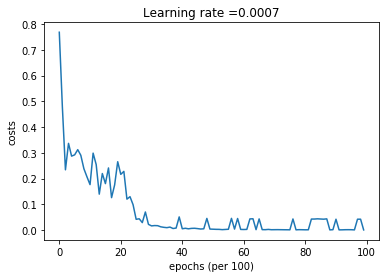

--- 797.6044399738312 seconds ---
Accuracy: 0.9883720930232558
Accuracy: 0.5999999999999999


In [211]:
# My gradient descent model
start_time = tm.time()
parameters_NL = L_layer_model_with_op(x_dev, y_dev, layers_dims, optimizer = "gd", print_cost=True)
print("--- %s seconds ---" %(tm.time()-start_time))

pred_NL_dev = predict(x_dev, y_dev, parameters_NL)
pred_NL_test_d = predict(x_test, y_test, parameters_NL)

Cost after epoch 0: 0.801173
Cost after epoch 1000: 0.141684
Cost after epoch 2000: 0.014985
Cost after epoch 3000: 0.004318
Cost after epoch 4000: 0.002261
Cost after epoch 5000: 0.001307
Cost after epoch 6000: 0.000909
Cost after epoch 7000: 0.001092
Cost after epoch 8000: 0.000732
Cost after epoch 9000: 0.000651


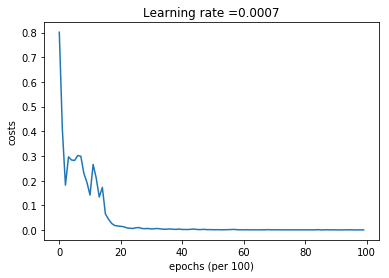

--- 879.7469763755798 seconds ---
Accuracy: 1.0
Accuracy: 0.5999999999999999


In [212]:
# My momentum model
start_time = tm.time()
parameters_NL = L_layer_model_with_op(x_dev, y_dev, layers_dims, optimizer = "momentum", print_cost=True)
print("--- %s seconds ---" %(tm.time()-start_time))

pred_NL_dev = predict(x_dev, y_dev, parameters_NL)
pred_NL_test_d = predict(x_test, y_test, parameters_NL)

Cost after epoch 0: 0.715363
Cost after epoch 1000: 0.586226
Cost after epoch 2000: 0.679253
Cost after epoch 3000: 0.655608
Cost after epoch 4000: 0.703813
Cost after epoch 5000: 0.631999
Cost after epoch 6000: 0.655613
Cost after epoch 7000: 0.655661
Cost after epoch 8000: 0.655735
Cost after epoch 9000: 0.631707


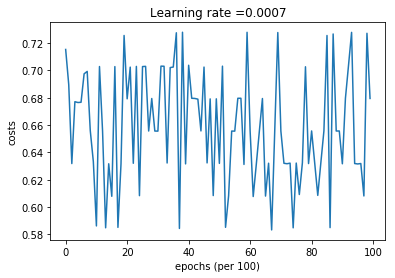

--- 2221.101236820221 seconds ---
Accuracy: 0.627906976744186
Accuracy: 0.6588235294117646


In [213]:
# My adam model
start_time = tm.time()
parameters_NL = L_layer_model_with_op(x_dev, y_dev, layers_dims, optimizer = "adam", print_cost=True)
print("--- %s seconds ---" %(tm.time()-start_time))

pred_NL_dev = predict(x_dev, y_dev, parameters_NL)
pred_NL_test_d = predict(x_test, y_test, parameters_NL)

### 4.11 -- Calculate the accurancy of the predicting results
Predict the results and the accuracy rate.
$$\hat{Y} = A = \sigma(w^T X + b)$$

In [ ]:
def predict(X, y, parameters):
    """
    Arguments:
        X -- data set of examples
        parameters -- parameters of the trained model
    
    Returns:
        p -- predictions for the given dataset X
    """
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))
    
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
            
    print("Accuracy: "+str(np.sum((p==y)/m)))
    return p

In [ ]:
pred_2L_dev = predict(x_dev, y_dev, parameters_2L)

**Expected Output** (for DNN verification):
<table>
    <tr>
        <td> **Accuracy**</td>
        <td> 1.0 </td>
    </tr>
</table>

In [ ]:
pred_NL_dev = predict(x_dev, y_dev, parameters_NL)

**Expected Output** (for DNN verification):
<table>
    <tr>
        <td> **Train Accuracy**</td>
        <td> 0.985645933014 </td>
    </tr>
</table>

In [ ]:
pred_2L_test_d = predict(x_test, y_test, parameters_2L)

**Expected Output** (for DNN verification):
<table>
    <tr>
        <td> **Accuracy**</td>
        <td> 0.72 </td>
    </tr>
</table>

In [ ]:
pred_NL_test_d = predict(x_test, y_test, parameters_NL)

**Expected Output** (for DNN verification):
<table>
    <tr>
        <td> **Accuracy**</td>
        <td> 0.8 </td>
    </tr>
</table>

## 5 - Train the model with training data
### 5.1 2-layer model

In [ ]:
### Constants ###
n_x = x_train.shape[0] # 128*128*3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [ ]:
start_time = tm.time()
parameters_2L_t = two_layer_model(x_train, y_train, layers_dims=(n_x, n_h, n_y), num_iterations=2500, print_cost=True)
print("--- %s seconds ---" %(tm.time()-start_time))

### 5.2 L-layer model

In [ ]:
### Constants ###
layers_dims = [x_train.shape[0], 20, 7, 5, 1] # 4-layer model

In [ ]:
start_time = tm.time()
parameters_NL_t = L_layer_model(x_train, y_train, layers_dims, num_iterations=2500, print_cost=True)
print("--- %s seconds ---" %(tm.time()-start_time))

### 5.3 Accuracy rates

In [ ]:
pred_2L_train = predict(x_train, y_train, parameters_2L_t)

In [ ]:
pred_NL_train = predict(x_train, y_train, parameters_2L_t)

## 6 - Verify with testing set

In [ ]:
pred_2L_test = predict(x_test, y_test, parameters_2L_t)

In [ ]:
pred_NL_test = predict(x_train, y_train, parameters_2L_t)